In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from pathlib import Path

from ultralytics.data.dataset import YOLODataset
from ultralytics.data.utils import IMG_FORMATS
from ultralytics.utils.plotting import Annotator

In [44]:
!pip install tabulate

In [46]:
from pathlib import Path
from collections import defaultdict
import pandas as pd
from IPython.display import display

# CONFIG
LABEL_DIRS = {
    "Train": Path("../datasets/urbanEye/dataset/labels/train"),
    "Synthetic": Path("../datasets/urbanEye/dataset/synthetic/labels")
}
CLASS_NAMES = [
    "GRAFFITI", "FADED_SIGNAGE", "POTHOLES", "GARBAGE",
    "CONSTRUCTION_ROAD", "BROKEN_SIGNAGE", "BAD_STREETLIGHT",
    "BAD_BILLBOARD", "SAND_ON_ROAD", "CLUTTER_SIDEWALK", "UNKEPT_FACADE"
]
# Recalculate summary into two tables: one for boxes, one for images
box_table = {}
image_table = {}

for source, label_dir in LABEL_DIRS.items():
    class_box_counts = defaultdict(int)
    class_image_ids = defaultdict(set)

    for label_file in label_dir.glob("*.txt"):
        with open(label_file, "r") as f:
            for line in f:
                if not line.strip():
                    continue
                cls_id = int(line.split()[0])
                class_box_counts[cls_id] += 1
                class_image_ids[cls_id].add(label_file.stem)

    for i, class_name in enumerate(CLASS_NAMES):
        if class_name not in box_table:
            box_table[class_name] = {}
            image_table[class_name] = {}
        box_table[class_name][source] = class_box_counts[i]
        image_table[class_name][source] = len(class_image_ids[i])

# Convert to DataFrames and add totals
df_boxes = pd.DataFrame(box_table).T.fillna(0).astype(int)
df_images = pd.DataFrame(image_table).T.fillna(0).astype(int)
df_boxes["Total"] = df_boxes.sum(axis=1)
df_images["Total"] = df_images.sum(axis=1)

# Tabulate both
from tabulate import tabulate
print("📦 Bounding Box Counts:")
print(tabulate(df_boxes.reset_index(), headers="keys", tablefmt="grid", showindex=False))

print("\n🖼️ Image Counts:")
print(tabulate(df_images.reset_index(), headers="keys", tablefmt="grid", showindex=False))


📦 Bounding Box Counts:
+-------------------+---------+-------------+---------+
| index             |   Train |   Synthetic |   Total |
+===================+=========+=============+=========+
| GRAFFITI          |     916 |           0 |     916 |
+-------------------+---------+-------------+---------+
| FADED_SIGNAGE     |      84 |         100 |     184 |
+-------------------+---------+-------------+---------+
| POTHOLES          |    2116 |           0 |    2116 |
+-------------------+---------+-------------+---------+
| GARBAGE           |    6929 |           0 |    6929 |
+-------------------+---------+-------------+---------+
| CONSTRUCTION_ROAD |    2231 |           0 |    2231 |
+-------------------+---------+-------------+---------+
| BROKEN_SIGNAGE    |      65 |         100 |     165 |
+-------------------+---------+-------------+---------+
| BAD_STREETLIGHT   |       1 |           0 |       1 |
+-------------------+---------+-------------+---------+
| BAD_BILLBOARD     |    

In [1]:
# Cell 2: Define config
IMG_PATH = "../datasets/urbanEye/dataset/images/train"  # change if needed
DATA_CONFIG = {
    "names": {
        0: "GRAFFITI",
        1: "FADED_SIGNAGE",
        2: "POTHOLES",
        3: "GARBAGE",
        4: "CONSTRUCTION_ROAD",
        5: "BROKEN_SIGNAGE",
        6: "BAD_STREETLIGHT",
        7: "BAD_BILLBOARD",
        8: "SAND_ON_ROAD",
        9: "CLUTTER_SIDEWALK",
        10: "UNKEPT_FACADE"

    },
    "nc": 11
}
RARE_CLASSES = {1, 5, 9}


In [2]:
from types import SimpleNamespace

hyp = SimpleNamespace(**{
    "mosaic": 1.0,
    "mixup": 0.3,
    "copy_paste": 0.5,
    "copy_paste_mode": "flip",
    "degrees": 0,
    "translate": 0.1,
    "scale": 0.5,
    "shear": 2.0,
    "perspective": 0.0,
    "flipud": 0.0,
    "fliplr": 0.5,
    "hsv_h": 0.015,
    "hsv_s": 0.7,
    "hsv_v": 0.4,
    "mask_ratio": 4,
    "overlap_mask": True,
    "bgr": 0.0,
})

dataset = YOLODataset(
    img_path=IMG_PATH,
    data=DATA_CONFIG,
    task="detect",
    imgsz=640,
    augment=True,
    hyp=hyp
)


NameError: name 'YOLODataset' is not defined

In [25]:
# Cell 4: Load one augmented sample
import random
sample = dataset[random.randint(0, len(dataset) - 1)]
img = sample["img"].permute(1, 2, 0).numpy().astype(np.uint8)
bboxes = sample["bboxes"]
labels = sample["cls"]

 Applied strong augment for minority class
['..\\datasets\\urbanEye\\dataset\\images\\train\\000b0fd767c5ab2656b7ed8d43674777.jpg', '..\\datasets\\urbanEye\\dataset\\images\\train\\000ed1547634a24f09f22530065d46c9.jpg', '..\\datasets\\urbanEye\\dataset\\images\\train\\0011b4d3f9068a9efbb84dc3157b76c9.jpg', '..\\datasets\\urbanEye\\dataset\\images\\train\\0019a9ab6fd5ef3df915241bc323afb5.jpg', '..\\datasets\\urbanEye\\dataset\\images\\train\\00349ffee00a2ce026ffb36e4e37caab.jpg', '..\\datasets\\urbanEye\\dataset\\images\\train\\00521f6fd0d749c9601a55eb8cf7533e.jpg', '..\\datasets\\urbanEye\\dataset\\images\\train\\00527ced822bed10c572ba797846ac4c.jpg', '..\\datasets\\urbanEye\\dataset\\images\\train\\00654503e1204235de86e81d948d0562.jpg', '..\\datasets\\urbanEye\\dataset\\images\\train\\00747f635a27ba324bf63b3d63d608e1.jpg', '..\\datasets\\urbanEye\\dataset\\images\\train\\00777add05cbc205d216d5b502706c8a.jpg', '..\\datasets\\urbanEye\\dataset\\images\\train\\007e06c0407b54ac0b971d3994c

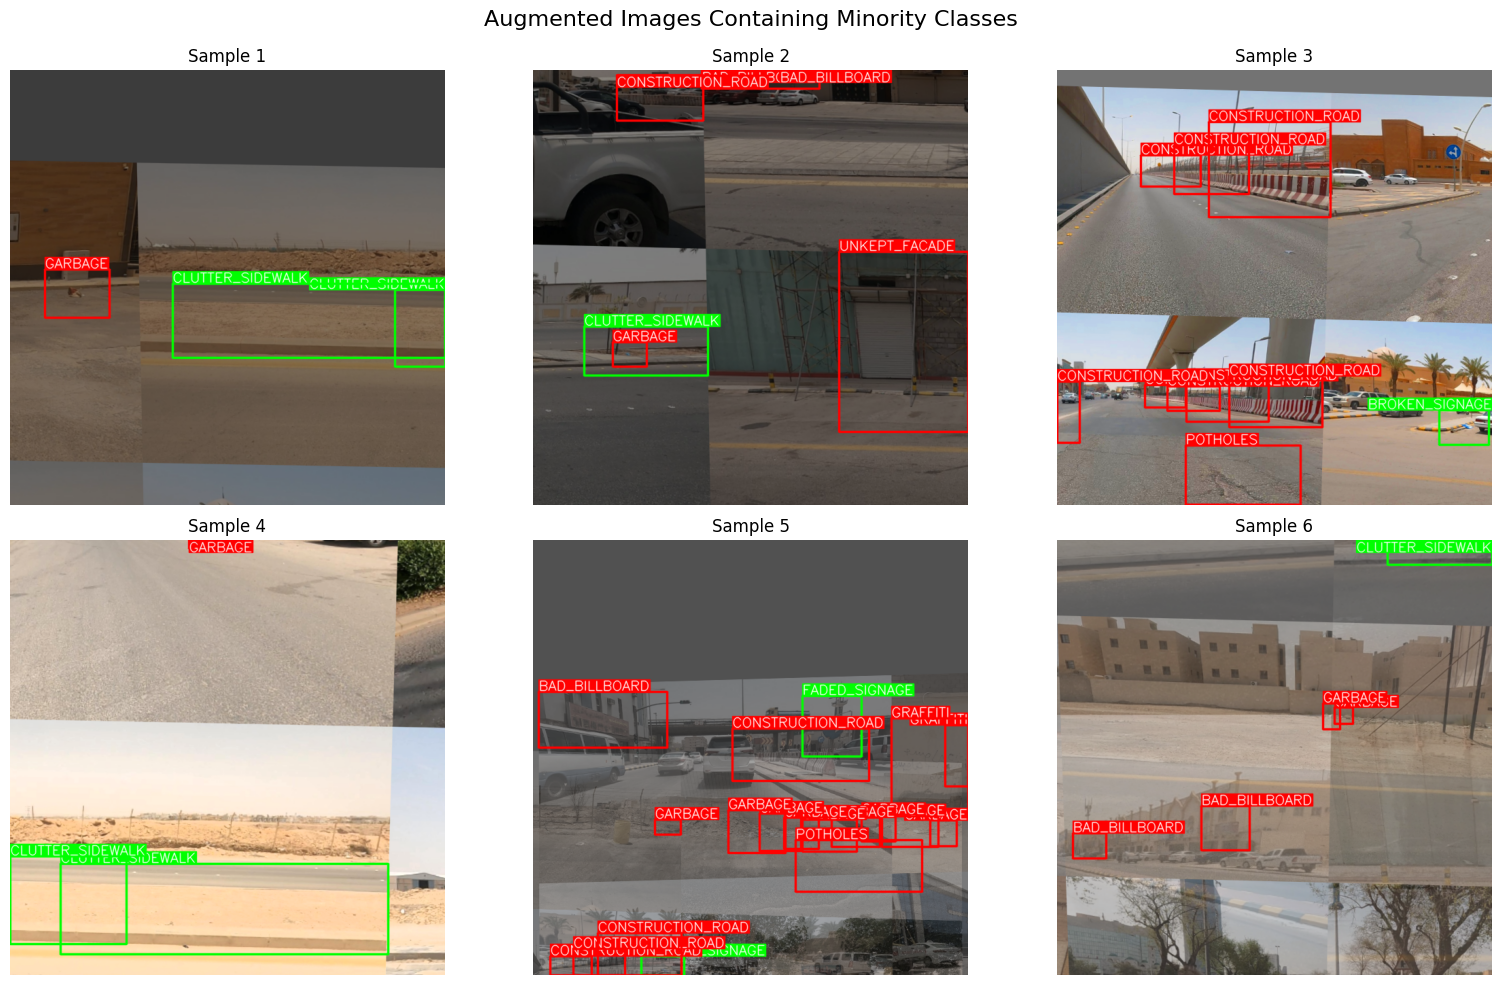

In [ ]:
# Show 6 samples that contain at least one minority class
ONLY_MINTORITY = False  # set to False to show all samples
num_images = 6
cols = 3
rows = (num_images + cols - 1) // cols

plt.figure(figsize=(16, 10))

shown = 0
tries = 0
max_tries = 200  # safety stop in case few rare-class samples exist

while shown < num_images and tries < max_tries:
    tries += 1
    sample = dataset[random.randint(0, len(dataset) - 1)]
    img = sample["img"].permute(1, 2, 0).numpy().astype(np.uint8)
    bboxes = sample["bboxes"]
    labels = sample["cls"]

    # Check if any class is in rare list
    if ONLY_MINTORITY and not any(int(cls.item()) in RARE_CLASSES for cls in labels):
        continue  # skip sample

    # Draw image
    h, w = img.shape[:2]
    annotator = Annotator(img.copy(), line_width=2)

    for j, box in enumerate(bboxes):
        box = box.numpy()
        cls_id = int(labels[j].item())
        name = DATA_CONFIG["names"][cls_id]

        # Convert from normalized xywh to absolute xyxy if needed
        if box.max() <= 1.0:
            x_c, y_c, bw, bh = box
            x1 = int((x_c - bw / 2) * w)
            y1 = int((y_c - bh / 2) * h)
            x2 = int((x_c + bw / 2) * w)
            y2 = int((y_c + bh / 2) * h)
            box = [x1, y1, x2, y2]
        else:
            box = box.astype(int)

        color = (0, 255, 0) if cls_id in RARE_CLASSES else (255, 0, 0)
        annotator.box_label(box, label=name, color=color)

    # Plot
    plt.subplot(rows, cols, shown + 1)
    plt.imshow(annotator.result())
    plt.axis("off")
    plt.title(f"Sample {shown + 1}")
    shown += 1
    print(dataset.im_files)

plt.tight_layout()
plt.suptitle("Augmented Images Containing Minority Classes", fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()


In [6]:
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
IMG_PATH = "../datasets/urbanEye/dataset/images/train"  
custom_images = [
    "000b0fd767c5ab2656b7ed8d43674777.jpg",
    "0fbfe80c0949bcc0f35f4c7484a83a52.jpg"
]

cols = 2  # original and augmented
rows = len(custom_images)

plt.figure(figsize=(12, rows * 5))

for row_idx, img_name in enumerate(custom_images):
    img_path = str(Path(IMG_PATH) / img_name)

    # ---- Load ORIGINAL image ----
    orig = np.array(Image.open(img_path).convert("RGB"))
    
    # ---- Find & load AUGMENTED image from dataset ----
    img_index = next((i for i, s in enumerate(dataset.im_files) if img_path in s), None)
    if img_index is None:
        print(f"Image not found in dataset: {img_name}")
        continue

    sample = dataset[img_index]
    aug = sample["img"].permute(1, 2, 0).numpy().astype(np.uint8)
    bboxes = sample["bboxes"]
    labels = sample["cls"]

    # Draw boxes on augmented image
    h, w = aug.shape[:2]
    annotator = Annotator(aug.copy(), line_width=2)
    for j, box in enumerate(bboxes):
        box = box.numpy()
        cls_id = int(labels[j].item())
        name = DATA_CONFIG["names"][cls_id]

        if box.max() <= 1.0:  # normalized xywh
            x_c, y_c, bw, bh = box
            x1 = int((x_c - bw / 2) * w)
            y1 = int((y_c - bh / 2) * h)
            x2 = int((x_c + bw / 2) * w)
            y2 = int((y_c + bh / 2) * h)
            box = [x1, y1, x2, y2]
        else:
            box = box.astype(int)

        color = (0, 255, 0) if cls_id in RARE_CLASSES else (255, 0, 0)
        annotator.box_label(box, label=name, color=color)

    # Plot ORIGINAL
    plt.subplot(rows, cols, row_idx * cols + 1)
    plt.imshow(orig)
    plt.axis("off")
    plt.title(f"Original: {img_name}")

    # Plot AUGMENTED
    plt.subplot(rows, cols, row_idx * cols + 2)
    plt.imshow(annotator.result())
    plt.axis("off")
    plt.title("Augmented")

plt.tight_layout()
plt.suptitle("Original vs. Augmented YOLO Training Images", fontsize=18)
plt.subplots_adjust(top=0.93)
plt.show()


NameError: name 'dataset' is not defined

<Figure size 1200x1000 with 0 Axes>

In [29]:
# CONFIG
IMG_DIR = Path("../datasets/urbanEye/dataset/images/train")
LBL_DIR = Path("../datasets/urbanEye/dataset/labels/train")
OUT_IMG_DIR = Path("../datasets/urbanEye/dataset/synthetic/images")
OUT_LBL_DIR = Path("../datasets/urbanEye/dataset/synthetic/labels")
OUT_IMG_DIR.mkdir(parents=True, exist_ok=True)
OUT_LBL_DIR.mkdir(parents=True, exist_ok=True)

IMG_SIZE = (960, 540)  # width, height
RARE_CLASSES = {1, 5, 9}
SYNTH_COUNT = 100  # number of synthetic images to generate
MAX_OBJECTS_PER_IMAGE = 3

# Helper: Convert YOLO to pixel xyxy
def yolo_to_xyxy(box, img_w, img_h):
    x_c, y_c, w, h = box
    x1 = int((x_c - w / 2) * img_w)
    y1 = int((y_c - h / 2) * img_h)
    x2 = int((x_c + w / 2) * img_w)
    y2 = int((y_c + h / 2) * img_h)
    return x1, y1, x2, y2

# Get all label files
label_files = sorted(LBL_DIR.glob("*.txt"))

# Extract rare-class objects
object_crops = []  # [(cls_id, cropped_img)]

for label_path in label_files:
    img_path = IMG_DIR / f"{label_path.stem}.jpg"
    if not img_path.exists():
        continue

    img = cv2.imread(str(img_path))
    h, w = img.shape[:2]

    with open(label_path, "r") as f:
        for line in f.readlines():
            parts = line.strip().split()
            cls_id = int(parts[0])
            if cls_id not in RARE_CLASSES:
                continue
            box = list(map(float, parts[1:]))
            x1, y1, x2, y2 = yolo_to_xyxy(box, w, h)
            crop = img[y1:y2, x1:x2]
            if crop.size == 0:
                continue
            object_crops.append((cls_id, crop))

print(f"✅ Collected {len(object_crops)} rare-class object crops.")

# Generate synthetic images
for i in range(SYNTH_COUNT):
    canvas = np.full((IMG_SIZE[1], IMG_SIZE[0], 3), 114, dtype=np.uint8)
    label_lines = []

    used_objects = random.sample(object_crops, k=min(len(object_crops), MAX_OBJECTS_PER_IMAGE))

    for cls_id, crop in used_objects:
        ch, cw = crop.shape[:2]
        if ch >= IMG_SIZE[1] or cw >= IMG_SIZE[0]:
            continue  # skip too big

        # Random paste location
        max_x = IMG_SIZE[0] - cw
        max_y = IMG_SIZE[1] - ch
        x1 = random.randint(0, max_x)
        y1 = random.randint(0, max_y)
        x2 = x1 + cw
        y2 = y1 + ch

        # Paste
        canvas[y1:y2, x1:x2] = crop

        # Convert to YOLO format
        x_c = (x1 + x2) / 2 / IMG_SIZE[0]
        y_c = (y1 + y2) / 2 / IMG_SIZE[1]
        bw = cw / IMG_SIZE[0]
        bh = ch / IMG_SIZE[1]
        label_lines.append(f"{cls_id} {x_c:.6f} {y_c:.6f} {bw:.6f} {bh:.6f}")

    # Save
    img_out = OUT_IMG_DIR / f"synthetic_{i:04d}.jpg"
    lbl_out = OUT_LBL_DIR / f"synthetic_{i:04d}.txt"
    cv2.imwrite(str(img_out), canvas)
    with open(lbl_out, "w") as f:
        f.write("\n".join(label_lines))

print(f"✅ Saved {SYNTH_COUNT} synthetic images to {OUT_IMG_DIR}")


✅ Collected 1936 rare-class object crops.
✅ Saved 100 synthetic images to ..\datasets\urbanEye\dataset\synthetic\images


In [ ]:
# Completely clean re-implementation of synthetic generator logic
import os
import cv2
import numpy as np
import random
from pathlib import Path
from collections import defaultdict
import pandas as pd

# CONFIG
IMG_DIR = Path("../datasets/urbanEye/dataset/images/train")
LBL_DIR = Path("../datasets/urbanEye/dataset/labels/train")
OUT_IMG_DIR = Path("../datasets/urbanEye/dataset/synthetic/images")
OUT_LBL_DIR = Path("../datasets/urbanEye/dataset/synthetic/labels")
OUT_IMG_DIR.mkdir(parents=True, exist_ok=True)
OUT_LBL_DIR.mkdir(parents=True, exist_ok=True)

IMG_SIZE = (960, 540)  # width, height
RARE_CLASSES = [1, 5, 9]
CLASS_NAMES = {
    1: "FADED_SIGNAGE",
    5: "BROKEN_SIGNAGE",
    9: "CLUTTER_SIDEWALK"
}
TARGET_BOXES_PER_CLASS = 2000
MAX_OBJECTS_PER_IMAGE = 3

# Helper: Convert YOLO to pixel xyxy
def yolo_to_xyxy(box, img_w, img_h):
    x_c, y_c, w, h = box
    x1 = int((x_c - w / 2) * img_w)
    y1 = int((y_c - h / 2) * img_h)
    x2 = int((x_c + w / 2) * img_w)
    y2 = int((y_c + h / 2) * img_h)
    return x1, y1, x2, y2

# Step 1: Extract crops by rare class
object_crops = {cls_id: [] for cls_id in RARE_CLASSES}
label_files = sorted(LBL_DIR.glob("*.txt"))

for label_path in label_files:
    img_path = IMG_DIR / f"{label_path.stem}.jpg"
    if not img_path.exists():
        continue

    img = cv2.imread(str(img_path))
    if img is None:
        continue
    h, w = img.shape[:2]

    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            cls_id = int(parts[0])
            if cls_id not in RARE_CLASSES:
                continue
            box = list(map(float, parts[1:]))
            x1, y1, x2, y2 = yolo_to_xyxy(box, w, h)
            crop = img[y1:y2, x1:x2]
            if crop.size == 0:
                continue
            object_crops[cls_id].append(crop)

# Step 2: Generate synthetic images until each class has 100 boxes
box_count = defaultdict(int)
image_count = defaultdict(int)
image_index = 0

while any(box_count[c] < TARGET_BOXES_PER_CLASS for c in RARE_CLASSES):
    canvas = np.full((IMG_SIZE[1], IMG_SIZE[0], 3), 114, dtype=np.uint8)
    label_lines = []
    boxes_in_this_image = defaultdict(int)

    # Pick a class that still needs boxes
    needed_classes = [cls for cls in RARE_CLASSES if box_count[cls] < TARGET_BOXES_PER_CLASS]
    cls_id = random.choice(needed_classes)
    crops = object_crops[cls_id]
    if not crops:
        continue

    k = min(MAX_OBJECTS_PER_IMAGE, TARGET_BOXES_PER_CLASS - box_count[cls_id])
    used = random.choices(crops, k=k)

    for crop in used:
        ch, cw = crop.shape[:2]
        if ch >= IMG_SIZE[1] or cw >= IMG_SIZE[0]:
            continue

        max_x = IMG_SIZE[0] - cw
        max_y = IMG_SIZE[1] - ch
        x1 = random.randint(0, max_x)
        y1 = random.randint(0, max_y)
        x2 = x1 + cw
        y2 = y1 + ch

        canvas[y1:y2, x1:x2] = crop

        x_c = (x1 + x2) / 2 / IMG_SIZE[0]
        y_c = (y1 + y2) / 2 / IMG_SIZE[1]
        bw = cw / IMG_SIZE[0]
        bh = ch / IMG_SIZE[1]
        label_lines.append(f"{cls_id} {x_c:.6f} {y_c:.6f} {bw:.6f} {bh:.6f}")
        box_count[cls_id] += 1
        boxes_in_this_image[cls_id] += 1

    if label_lines:
        name = f"synth_{image_index:04d}"
        cv2.imwrite(str(OUT_IMG_DIR / f"{name}.jpg"), canvas)
        with open(OUT_LBL_DIR / f"{name}.txt", "w") as f:
            f.write("\n".join(label_lines))
        for c in boxes_in_this_image:
            image_count[c] += 1
        image_index += 1

# Summary
summary = {CLASS_NAMES[c]: {"boxes": box_count[c], "images": image_count[c]} for c in RARE_CLASSES}

summary_df = pd.DataFrame(summary).T
display(summary_df)
# tools.display_dataframe_to_user(name="Synthetic Box Summary", dataframe=pd.DataFrame(summary).T)


boxes  images
FADED_SIGNAGE       100      34
BROKEN_SIGNAGE      100      34
CLUTTER_SIDEWALK    100      34

In [ ]:
from pathlib import Path
from collections import defaultdict
import pandas as pd
import numpy as np
from IPython.display import display
from tabulate import tabulate
import matplotlib.pyplot as plt

SHOW_WEIGHTS = True  # set to False to skip weight calculation
SHOW_ONLY_TOTAL = True  # set to False to skip weight calculation
# CONFIG
LABEL_DIRS = {
    "Train": Path("../datasets/urbanEye/dataset/labels/train"),
    # "Synthetic": Path("../datasets/urbanEye/dataset/synthetic/labels"),
    "eval": Path("../datasets/urbanEye/dataset/labels/eval"),
    "test": Path("../datasets/urbanEye/dataset/labels/test"),
}
CLASS_NAMES = [
    "GRAFFITI", "FADED_SIGNAGE", "POTHOLES", "GARBAGE",
    "CONSTRUCTION_ROAD", "BROKEN_SIGNAGE", "BAD_STREETLIGHT",
    "BAD_BILLBOARD", "SAND_ON_ROAD", "CLUTTER_SIDEWALK", "UNKEPT_FACADE"
]

# Generate summary from actual data
summary = defaultdict(dict)

for source, label_dir in LABEL_DIRS.items():
    class_counts = defaultdict(int)
    image_counts = defaultdict(set)

    for label_file in label_dir.glob("*.txt"):
        with open(label_file, "r") as f:
            for line in f:
                if not line.strip():
                    continue
                cls_id = int(line.split()[0])
                class_counts[CLASS_NAMES[cls_id]] += 1
                image_counts[CLASS_NAMES[cls_id]].add(label_file.stem)

    for cls in CLASS_NAMES:
        summary[cls][f"{source}_Boxes"] = class_counts[cls]
        summary[cls][f"{source}_Images"] = len(image_counts[cls])

# Create box and image tables
box_table = {}
image_table = {}

for name in CLASS_NAMES:
    box_table[name] = {}
    image_table[name] = {}
    for source in LABEL_DIRS:
        box_table[name][source] = summary[name].get(f"{source}_Boxes", 0)
        image_table[name][source] = summary[name].get(f"{source}_Images", 0)
    box_table[name]["Total"] = sum(box_table[name].values())
    image_table[name]["Total"] = sum(image_table[name].values())


# Convert to DataFrames
df_boxes = pd.DataFrame.from_dict(box_table, orient="index")
df_images = pd.DataFrame.from_dict(image_table, orient="index")

if SHOW_WEIGHTS:
    # Compute normalized class weights from box totals
    df_boxes["Raw Weight"] = 1 / np.sqrt(df_boxes["Total"].clip(lower=1))  # prevent division by zero
    total_weight = df_boxes["Raw Weight"].sum()
    df_boxes["Normalized Weight (sum=10)"] = df_boxes["Raw Weight"] / total_weight * 10
    df_boxes["Rounded"] = df_boxes["Normalized Weight (sum=10)"].round(4)

    # Prepare final weight list
    yaml_weights_from_df = df_boxes["Rounded"].tolist()

    print("YAML Weights:", yaml_weights_from_df)

# Display tables
print("\n📦 Box Counts per Class")
print(tabulate((df_boxes[['Total']] if SHOW_ONLY_TOTAL else df_boxes).reset_index().rename(columns={"index": "Class Name"}), headers="keys", tablefmt="grid"))

if SHOW_WEIGHTS:
    # Plot the class weights as a bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(df_boxes.index, df_boxes["Rounded"], color='skyblue')
    plt.ylabel("Class Weight")
    plt.title("Normalized Class Weights from Bounding Box Counts")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

print("\n🖼️ Image Counts per Class")
print(tabulate(df_images.reset_index().rename(columns={"index": "Class Name"}), headers="keys", tablefmt="grid"))



📦 Box Counts per Class
+----+-------------------+---------+
|    | Class Name        |   Total |
+====+===================+=========+
|  0 | GRAFFITI          |    1124 |
+----+-------------------+---------+
|  1 | FADED_SIGNAGE     |     107 |
+----+-------------------+---------+
|  2 | POTHOLES          |    2625 |
+----+-------------------+---------+
|  3 | GARBAGE           |    8597 |
+----+-------------------+---------+
|  4 | CONSTRUCTION_ROAD |    2730 |
+----+-------------------+---------+
|  5 | BROKEN_SIGNAGE    |      83 |
+----+-------------------+---------+
|  6 | BAD_STREETLIGHT   |       1 |
+----+-------------------+---------+
|  7 | BAD_BILLBOARD     |    1555 |
+----+-------------------+---------+
|  8 | SAND_ON_ROAD      |     748 |
+----+-------------------+---------+
|  9 | CLUTTER_SIDEWALK  |    2253 |
+----+-------------------+---------+
| 10 | UNKEPT_FACADE     |     127 |
+----+-------------------+---------+

🖼️ Image Counts per Class
+----+------------------

Class Weights from df_boxes
+----+-------------------+---------+-------------+---------+--------------+------------------------------+-----------+
|    | Class Name        |   Train |   Synthetic |   Total |   Raw Weight |   Normalized Weight (sum=10) |   Rounded |
+====+===================+=========+=============+=========+==============+==============================+===========+
|  0 | GRAFFITI          |     916 |           0 |     916 |    0.0330409 |                     0.230974 |    0.231  |
+----+-------------------+---------+-------------+---------+--------------+------------------------------+-----------+
|  1 | FADED_SIGNAGE     |      84 |         100 |     184 |    0.073721  |                     0.51535  |    0.5154 |
+----+-------------------+---------+-------------+---------+--------------+------------------------------+-----------+
|  2 | POTHOLES          |    2116 |           0 |    2116 |    0.0217391 |                     0.151968 |    0.152  |
+----+--------------

In [1]:
from pathlib import Path
import os
import cv2
import numpy as np
import random
from collections import defaultdict
import pandas as pd
import shutil

# CONFIG
IMG_DIR = Path("../datasets/urbanEye/dataset/images/train")
LBL_DIR = Path("../datasets/urbanEye/dataset/labels/train")
SYN_IMG_DIR = Path("../datasets/urbanEye/dataset/synthetic/images")
SYN_LBL_DIR = Path("../datasets/urbanEye/dataset/synthetic/labels")
SYN_IMG_DIR.mkdir(parents=True, exist_ok=True)
SYN_LBL_DIR.mkdir(parents=True, exist_ok=True)

IMG_SIZE = (960, 540)  # width, height
MAX_OBJECTS_PER_IMAGE = 3
TARGET_BOXES_PER_CLASS = 1000

# Load original box counts per class
original_counts = defaultdict(int)
label_files = sorted(LBL_DIR.glob("*.txt"))

for label_file in label_files:
    with open(label_file, "r") as f:
        for line in f:
            if not line.strip():
                continue
            cls_id = int(line.split()[0])
            original_counts[cls_id] += 1

# Identify which classes need boosting and how much
boxes_needed = {cls: max(0, TARGET_BOXES_PER_CLASS - count) for cls, count in original_counts.items()}

# Extract all available object crops by class
object_crops = defaultdict(list)

for label_file in label_files:
    img_path = IMG_DIR / f"{label_file.stem}.jpg"
    if not img_path.exists():
        continue
    img = cv2.imread(str(img_path))
    if img is None:
        continue
    h, w = img.shape[:2]

    with open(label_file, "r") as f:
        for line in f:
            parts = line.strip().split()
            cls_id = int(parts[0])
            if boxes_needed[cls_id] == 0:
                continue
            box = list(map(float, parts[1:]))
            x_c, y_c, bw, bh = box
            x1 = int((x_c - bw / 2) * w)
            y1 = int((y_c - bh / 2) * h)
            x2 = int((x_c + bw / 2) * w)
            y2 = int((y_c + bh / 2) * h)
            crop = img[y1:y2, x1:x2]
            if crop.size > 0:
                object_crops[cls_id].append(crop)

# Generate synthetic images
synth_counts = defaultdict(int)
image_index = 0

while any(synth_counts[c] < boxes_needed[c] for c in boxes_needed if boxes_needed[c] > 0):
    canvas = np.full((IMG_SIZE[1], IMG_SIZE[0], 3), 114, dtype=np.uint8)
    label_lines = []
    added_this_image = defaultdict(int)

    eligible_classes = [cls for cls in boxes_needed if boxes_needed[cls] > 0 and synth_counts[cls] < boxes_needed[cls]]
    if not eligible_classes:
        break

    cls_id = random.choice(eligible_classes)
    k = min(MAX_OBJECTS_PER_IMAGE, boxes_needed[cls_id] - synth_counts[cls_id])
    candidates = object_crops[cls_id]
    if not candidates:
        continue
    used = random.choices(candidates, k=k)

    for crop in used:
        ch, cw = crop.shape[:2]
        if ch >= IMG_SIZE[1] or cw >= IMG_SIZE[0]:
            continue

        max_x = IMG_SIZE[0] - cw
        max_y = IMG_SIZE[1] - ch
        x1 = random.randint(0, max_x)
        y1 = random.randint(0, max_y)
        x2 = x1 + cw
        y2 = y1 + ch

        canvas[y1:y2, x1:x2] = crop

        x_c = (x1 + x2) / 2 / IMG_SIZE[0]
        y_c = (y1 + y2) / 2 / IMG_SIZE[1]
        bw = cw / IMG_SIZE[0]
        bh = ch / IMG_SIZE[1]
        label_lines.append(f"{cls_id} {x_c:.6f} {y_c:.6f} {bw:.6f} {bh:.6f}")
        synth_counts[cls_id] += 1
        added_this_image[cls_id] += 1

    if label_lines:
        name = f"synth_{image_index:04d}"
        cv2.imwrite(str(SYN_IMG_DIR / f"{name}.jpg"), canvas)
        with open(SYN_LBL_DIR / f"{name}.txt", "w") as f:
            f.write("\n".join(label_lines))
        image_index += 1

# Summary table
summary = {
    f"Class {cls}": {
        "Original": original_counts[cls],
        "Needed": boxes_needed[cls],
        "Generated": synth_counts[cls],
        "Total": original_counts[cls] + synth_counts[cls]
    } for cls in sorted(set(original_counts.keys()) | set(synth_counts.keys()))
}
# tools.display_dataframe_to_user(name="Dynamic Synthetic Box Summary", dataframe=pd.DataFrame(summary).T)
print(pd.DataFrame(summary).T)

from tabulate import tabulate
print("Dynamic Synthetic Box Summary")
print(tabulate(pd.DataFrame(summary).T.reset_index(), headers="keys", tablefmt="grid", showindex=False))


          Original  Needed  Generated  Total
Class 0        916      84         84   1000
Class 1         84     916        916   1000
Class 2       2116       0          0   2116
Class 3       6929       0          0   6929
Class 4       2231       0          0   2231
Class 5         65     935        935   1000
Class 6          1     999        999   1000
Class 7       1218       0          0   1218
Class 8        575     425        425   1000
Class 9       1787       0          0   1787
Class 10       105     895        895   1000
Dynamic Synthetic Box Summary
+----------+------------+----------+-------------+---------+
| index    |   Original |   Needed |   Generated |   Total |
+==========+============+==========+=============+=========+
| Class 0  |        916 |       84 |          84 |    1000 |
+----------+------------+----------+-------------+---------+
| Class 1  |         84 |      916 |         916 |    1000 |
+----------+------------+----------+-------------+---------+
| C